#### Загрузка данных и первичный осмотр

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/ASUS Vivobook Flip S/Desktop/ИИ/Домашки/Семинар 02/S02-hw-dataset.csv')

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


#### Проверим качество данных


##### Пропуски:

In [4]:
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

##### Дубликаты:

In [5]:
df.duplicated().sum()

np.int64(1)

##### Подозрительные значения:
  - Возраст < 10 или > 100.
  - Отрицательные покупки.
  - Нулевая выручка при ненулевых покупках.

In [6]:
df[(df['age'] < 10) | (df['age'] > 100)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488


In [7]:
df[df['purchases'] < 0]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [8]:
df[(df['purchases'] > 0) & (df['revenue'] == 0)]

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


В данных есть пропуски по возрасту — около 5%, остальное заполнено нормально. Нашёлся один дубликат, мелочь, но лучше потом убрать

Ещё есть странные значения: возраст меньше 10 и больше 100, отрицательные покупки и случаи, где покупки есть, а выручка ноль. В целом, не ужас, но чистить надо

#### Базовый EDA: группировки, агрегаты и частоты

##### Посчитаем частоты для одной переменной

In [12]:
df['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

##### Теперь выполним группировку с агрегатами через `groupby`

In [13]:
df.groupby('country')['revenue'].agg(['mean', 'sum', 'count'])

,mean,sum,count
country,,,
CN,1054.000000,2108,2
DE,1445.500000,8673,6
FR,675.916667,8111,12
RU,790.076923,10271,13
US,557.375000,4459,8


##### Выведем также дополнительные корридоры и группировки

In [14]:
bins = [0, 18, 30, 50, 100]
labels = ['child', 'young', 'adult', 'senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

df.groupby('age_group')['purchases'].mean()


C:\Users\ASUS Vivobook Flip S\AppData\Local\Temp\ipykernel_15888\1765571411.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['purchases'].mean()


age_group
child     6.000000
young     4.461538
adult     4.941176
senior    5.000000
Name: purchases, dtype: float64

В выборке больше всего данных по России и Франции — они явно доминируют, а вот Китай и Германия представлены скромнее. По среднему доходу Германия впереди всех. США, несмотря на приличное число записей, показывают самый низкий средний доход

Если смотреть на возрастные группы, то дети совершают больше покупок в среднем, чем взрослые и пожилые

#### Визуализация данных в Matplotlib

##### Гистограмма возраста

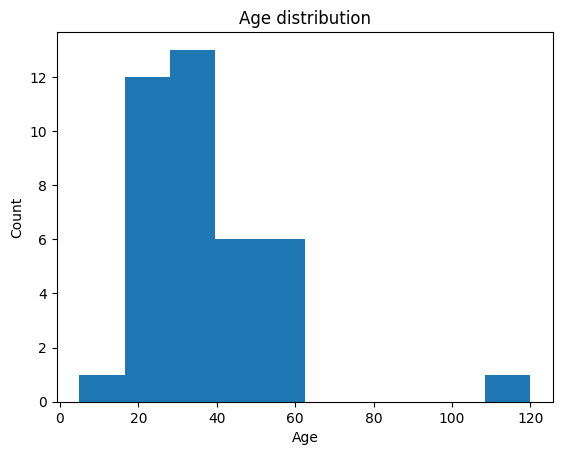

In [13]:
plt.hist(df['age'].dropna(), bins=10)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age distribution")
plt.savefig("figures/age_hist.png")
plt.show()


Показано, как распределены пользователи по возрасту. Больше всего людей в диапазоне от 20 до 60 лет, есть выбросы вроде 5 и 120 лет

##### Boxplot по выручке

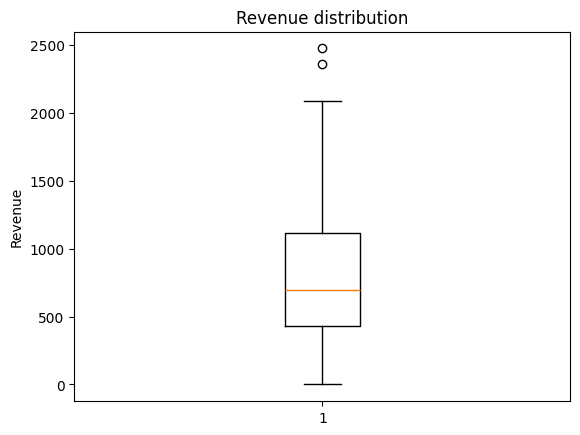

In [14]:
plt.boxplot(df['revenue'])
plt.ylabel("Revenue")
plt.title("Revenue distribution")
plt.savefig("figures/revenue_box.png")
plt.show()


График показывает разброс значений выручки. Видно, что есть несколько очень больших значений — это выбросы

##### Scatter plot (покупки vs выручка)

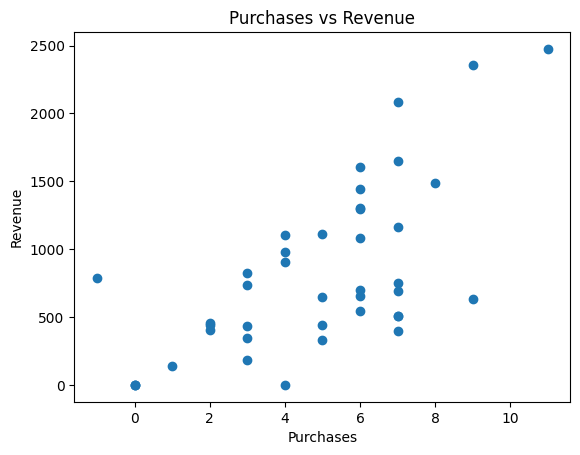

In [16]:
plt.scatter(df['purchases'], df['revenue'])
plt.xlabel("Purchases")
plt.ylabel("Revenue")
plt.title("Purchases vs Revenue")
plt.savefig("figures/scatter.png")
plt.show()


Диаграмма показывает связь между количеством покупок и выручкой. В целом, чем больше покупок — тем выше выручка, но есть исключения